In [105]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sn

In [106]:
#read the file 
data= pd.read_csv('pharmacy_tx_type.csv') 
data

,tx_date,pharmacy,diagnosis,Type,Drug,bin,pcn,group,rejected,patient_pay
0,1/2/2022,Pharmacy #6,G99.93,branded,tanoclolol,725700,1UQC,NaN,False,13.39
1,1/2/2022,Pharmacy #42,U60.52,branded,oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,1/2/2022,Pharmacy #37,Q85.91,branded,cupitelol,725700,1UQC,NaN,False,13.39
3,1/2/2022,Pharmacy #30,U60.52,generic,oxasoted,571569,KB38N,6BYJBW,False,10.84
4,1/2/2022,Pharmacy #18,N55.01,branded,mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...,...
1048570,2/3/2022,Pharmacy #19,O91.95,branded,bovirol,664344,NaN,STGRDKR1J5RD,False,12.68
1048571,2/3/2022,Pharmacy #19,I68.27,branded,hidizuzunib,757349,NaN,9R3Z3QKDF3,True,0.00
1048572,2/3/2022,Pharmacy #3,H36.57,branded,tocilic,664344,DY4B,NaN,False,35.73
1048573,2/3/2022,Pharmacy #27,M42.24,branded,hivir,664344,CS8580,NaN,False,13.33


In [107]:
y= data['rejected']
x= data['Type']

In [108]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: rejected, dtype: bool

# Logistic

In [109]:
data

,tx_date,pharmacy,diagnosis,Type,Drug,bin,pcn,group,rejected,patient_pay
0,1/2/2022,Pharmacy #6,G99.93,branded,tanoclolol,725700,1UQC,NaN,False,13.39
1,1/2/2022,Pharmacy #42,U60.52,branded,oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,1/2/2022,Pharmacy #37,Q85.91,branded,cupitelol,725700,1UQC,NaN,False,13.39
3,1/2/2022,Pharmacy #30,U60.52,generic,oxasoted,571569,KB38N,6BYJBW,False,10.84
4,1/2/2022,Pharmacy #18,N55.01,branded,mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...,...
1048570,2/3/2022,Pharmacy #19,O91.95,branded,bovirol,664344,NaN,STGRDKR1J5RD,False,12.68
1048571,2/3/2022,Pharmacy #19,I68.27,branded,hidizuzunib,757349,NaN,9R3Z3QKDF3,True,0.00
1048572,2/3/2022,Pharmacy #3,H36.57,branded,tocilic,664344,DY4B,NaN,False,35.73
1048573,2/3/2022,Pharmacy #27,M42.24,branded,hivir,664344,CS8580,NaN,False,13.33


In [110]:
pd.get_dummies(data['Type'])
data.loc[:,'branded'] = pd.get_dummies(data['Type'])['branded'].copy()

In [111]:
pd.get_dummies(data['rejected'])
data.loc[:,"True Rejected"] = pd.get_dummies(data['rejected'])[True].copy()

In [112]:
data

,tx_date,pharmacy,diagnosis,Type,Drug,bin,pcn,group,rejected,patient_pay,branded,True Rejected
0,1/2/2022,Pharmacy #6,G99.93,branded,tanoclolol,725700,1UQC,NaN,False,13.39,1,0
1,1/2/2022,Pharmacy #42,U60.52,branded,oxasoted,664344,NaN,52H8KH0F83K,False,7.02,1,0
2,1/2/2022,Pharmacy #37,Q85.91,branded,cupitelol,725700,1UQC,NaN,False,13.39,1,0
3,1/2/2022,Pharmacy #30,U60.52,generic,oxasoted,571569,KB38N,6BYJBW,False,10.84,0,0
4,1/2/2022,Pharmacy #18,N55.01,branded,mamate,664344,NaN,ZX2QUWR,False,47.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2/3/2022,Pharmacy #19,O91.95,branded,bovirol,664344,NaN,STGRDKR1J5RD,False,12.68,1,0
1048571,2/3/2022,Pharmacy #19,I68.27,branded,hidizuzunib,757349,NaN,9R3Z3QKDF3,True,0.00,1,1
1048572,2/3/2022,Pharmacy #3,H36.57,branded,tocilic,664344,DY4B,NaN,False,35.73,1,0
1048573,2/3/2022,Pharmacy #27,M42.24,branded,hivir,664344,CS8580,NaN,False,13.33,1,0


In [113]:
X= data[['branded']]
y= data['True Rejected']

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2,
                                                       stratify=y)

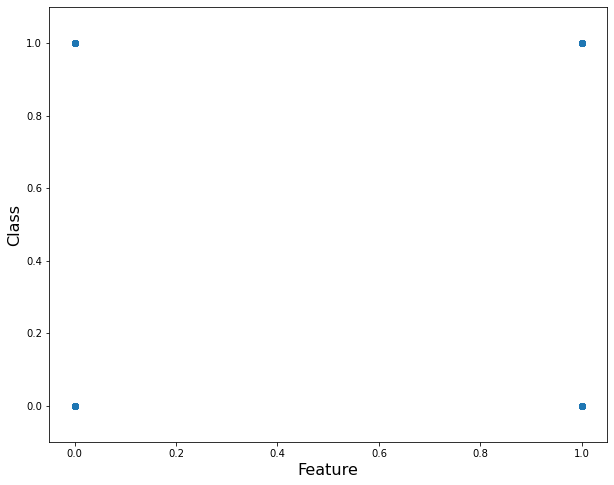

In [116]:
plt.figure(figsize = (10,8))

plt.scatter(X_train,y_train)
plt.ylim((-.1,1.1))
plt.xlabel("Feature",fontsize = 16)
plt.ylabel("Class",fontsize = 16)

plt.show()

In [117]:
#as expected we have 4 categories

In [118]:
## import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [120]:
## make model object
log_reg = LogisticRegression()

## fit the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [121]:
## Demonstrate predict
y_pred=log_reg.predict(X_train)

In [122]:
## Demonstrate predict_proba
log_reg.predict_proba(X_train)

array([[0.87869106, 0.12130894],
       [0.87869106, 0.12130894],
       [0.9955664 , 0.0044336 ],
       ...,
       [0.87869106, 0.12130894],
       [0.87869106, 0.12130894],
       [0.87869106, 0.12130894]])

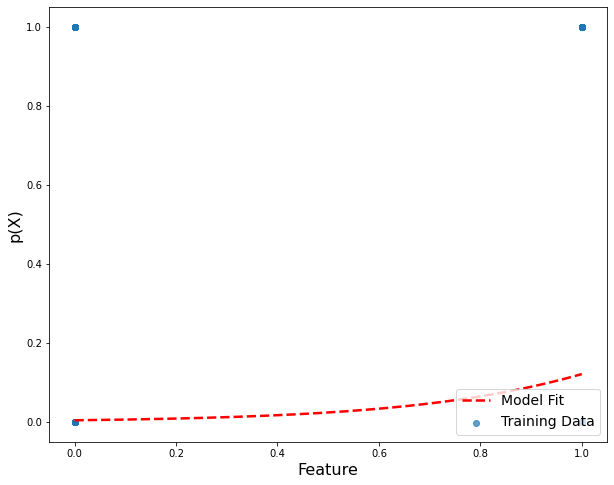

In [123]:
# Plot figure 
plt.figure(figsize = (10,8))

# With classifications we have a new method
# predict_proba which returns the probability
# that an observation is a certain class.
plt.plot(np.linspace(0,1,1000),
            log_reg.predict_proba(np.linspace(0,1,1000).reshape(-1,1))[:,1],
            'r--',linewidth=2.5,label = "Model Fit")
plt.scatter(X_train,y_train,label = 'Training Data',alpha=.7)
plt.legend(fontsize = 14,loc = 4)
plt.xlabel("Feature",fontsize = 16)
plt.ylabel("p(X)",fontsize=16) 

plt.show()

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

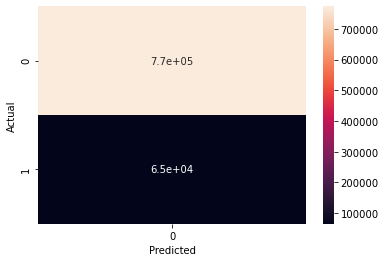

In [124]:
confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [126]:
from sklearn import metrics

In [127]:
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred))
plt.show()

Accuracy:  0.922102615454307


In [129]:
#Being branded increases the likelihood of being 
log_reg.coef_

array([[3.43400686]])

In [131]:
np.round(np.exp(1*log_reg.coef_[0][0]),2)

31.0

In [ ]:
#Getting branded medicine increases the probability of getting rejected by 31.0